In [37]:
library('igraph')
library('Matrix')
library('pracma')

In [38]:
create_transition_matrix = function (g){
    
    # WARNING: make sure your graph is connected (you might input GCC of your graph)
    
    vs = V(g)
    n = vcount(g)
    adj = as_adjacency_matrix(g)
    adj[diag(rowSums(adj) == 0)] = 1  # handle if the user is using the function for networks with isolated nodes by creating self-edges
    z = matrix(rowSums(adj, , 1))
    
    transition_matrix = adj / repmat(z, 1, n)  # normalize to get probabilities
    
    return(transition_matrix)
}

In [39]:
random_walk = function (g, num_steps, start_node, transition_matrix = NULL){
    if(is.null(transition_matrix))
        transition_matrix = create_transition_matrix(g)
        
    v = start_node
    for(i in 1:num_steps){
        fprintf('Step %d: %d\n', i, v)  # COMMENT THIS
        PMF = transition_matrix[v, ]
        v = sample(1:vcount(g), 1, prob = PMF)        
    }
    
    return(v)
}

# Random Walks on ER Graph

[1] 6

[1] 10.002

[1] 10.06806

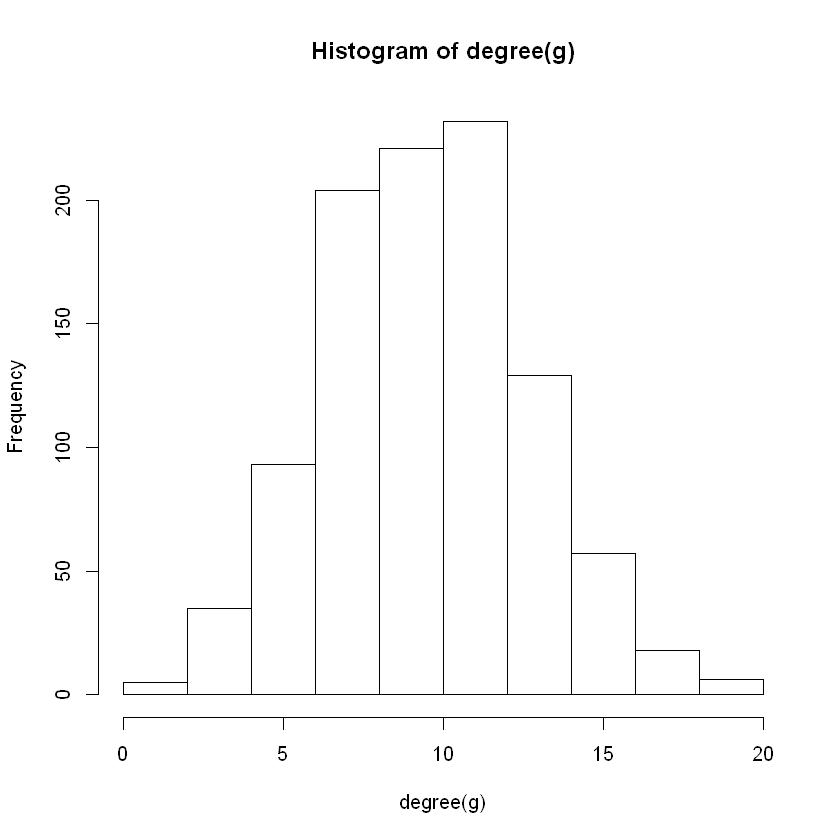

In [40]:
p = 0.01
n = 1000
g = erdos.renyi.game(n, p, directed=F)
#layout <-layout.fruchterman.reingold(g)
#plot(g, layout=layout)

#clusters(g) # potentially for smaller graphs, it may be the case that graphs are disconnected. 

#find the diameter. 
diameter(g)

mean(degree(g))
var(degree(g))
hist(degree(g))

In [41]:
n_trials = 500
t_max = floor(5*log(vcount(g)))

dists = numeric(t_max)
dists2 = numeric(t_max)
end_degree = numeric(n_trials)

for (i in 1:n_trials) {
    v_start = sample(V(g), 1) # get a random node. 
    
    v = v_start
    for (t in 1:t_max) {
        neigh = c(v, neighbors(g, v)) # find all the neighbors to the node. 
        if (length(neigh) == 1)
            v = neigh
        else
            v = sample(neigh, 1) # get a random neighbor. 
        sp = shortest.paths(g, v_start, v)
        dists[t] = dists[t] + sp # keep a running tally of the distances for each time t.
        dists2[t] = dists2[t] + sp^2
    }   
    end_degree[i] = degree(g, v)
}
dists = dists / n_trials; # take the average. 
dists2 = dists2 / n_trials; # take the second moment. 

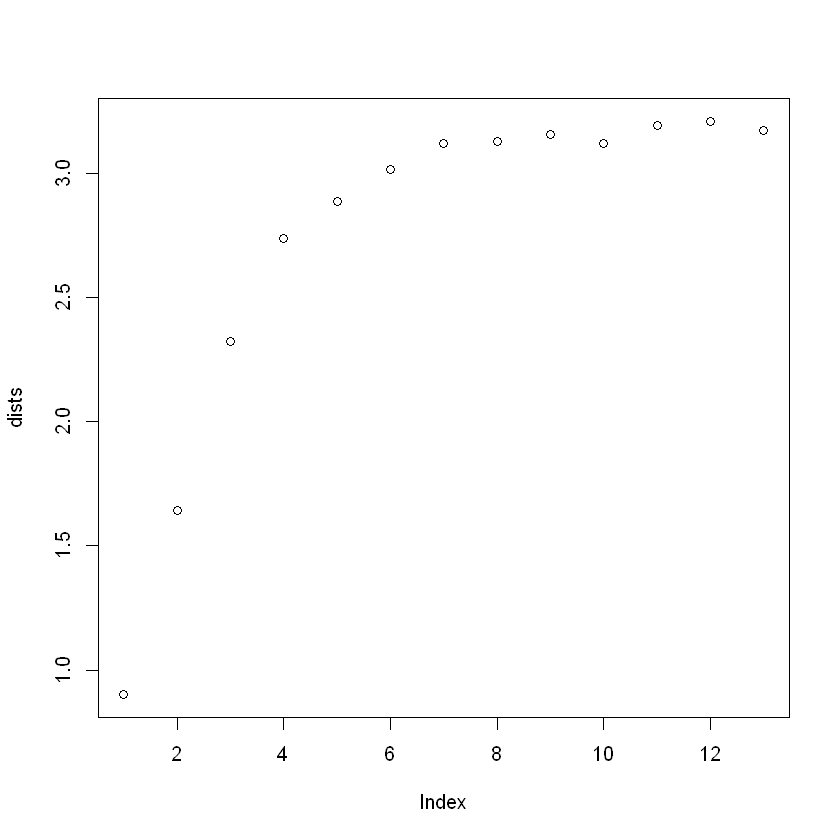

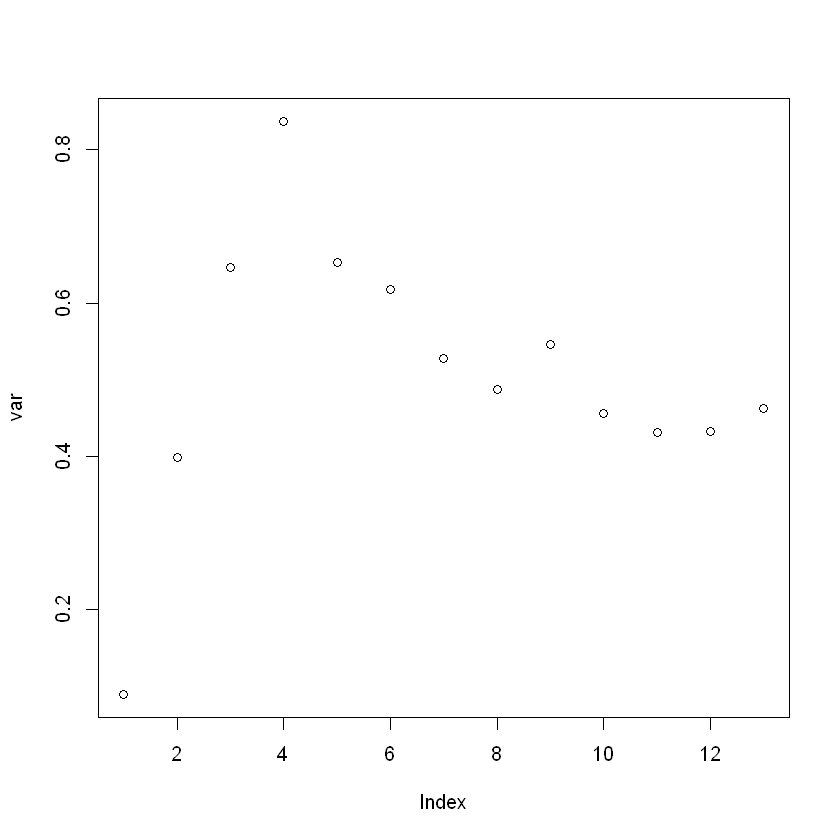

In [42]:
plot(dists)
var = dists2 - dists^2 # check if this is how we do the variance (because I don't want to save all the values)
plot(var)

[1] 10.792

[1] 8.710156

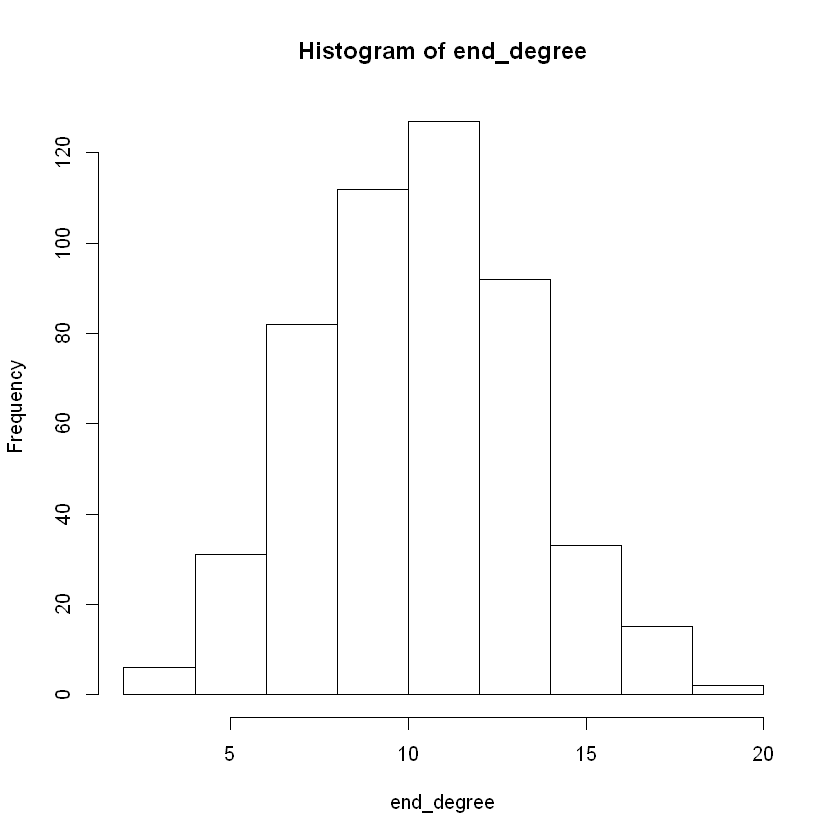

In [43]:
mean(end_degree)
var(end_degree)
hist(end_degree)

Here, we notice a couple of things with respect to the average distance, the variance, and the ending degree of the node. 
1. We notice that the average distance from the starting node stabilizes very quickly and ends up at around 3 away from the starting node, which is conveniently half of the diameter of the graph itself. 
2. The variance, like the average distance, also stabilizes as well. 
2. We expect that because of the random walk, we would push the ending degree distribution to be slightly higher. Because all nodes in an ER graph are statistically the same, the end result for the end degree distribution shows little difference to that of the starting distribution. However, we do note that the average has gone up slightly. 

###  Smaller Graph (n = 100)

[1] 14

[1] 1.06

[1] 0.9660606

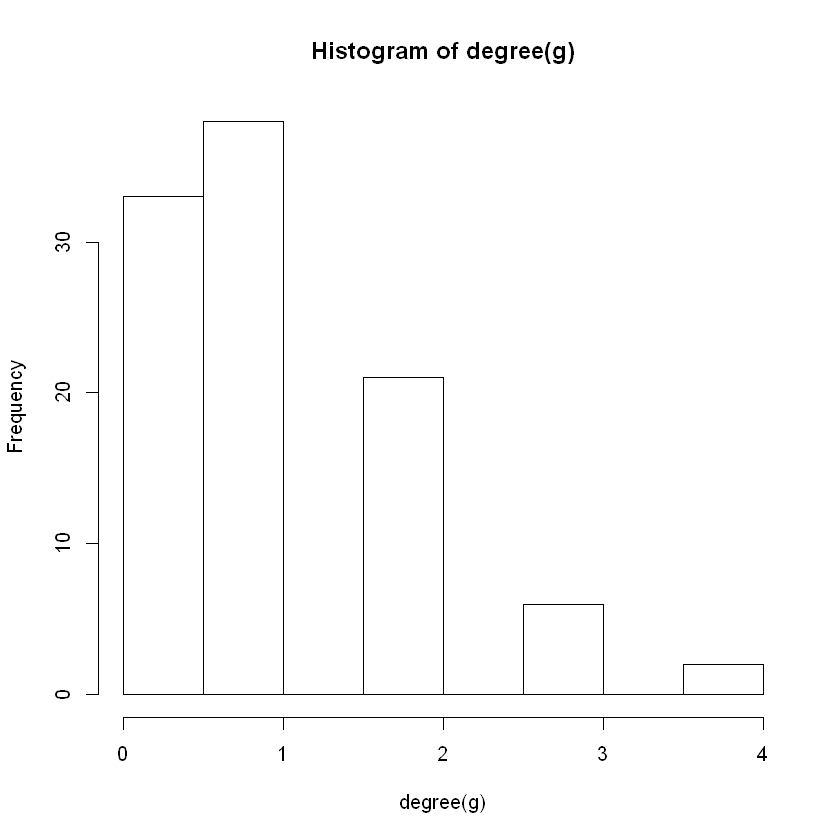

In [100]:
p = 0.01
n = 100
g = erdos.renyi.game(n, p, directed=F)
#layout <-layout.fruchterman.reingold(g)
#plot(g, layout=layout)

#clusters(g) # potentially for smaller graphs, it may be the case that graphs are disconnected. 

#find the diameter. 
diameter(g)

mean(degree(g))
var(degree(g))
hist(degree(g))

In [105]:
n_trials = 200
t_max = floor(30*log(vcount(g)))

dists = numeric(t_max)
dists2 = numeric(t_max)
end_degree = numeric(n_trials)

for (i in 1:n_trials) {
    v_start = sample(V(g), 1) # get a random node. 
    
    v = v_start
    for (t in 1:t_max) {
        neigh = c(v, neighbors(g, v)) # find all the neighbors to the node. 
        if (length(neigh) == 1)
            v = neigh
        else
            v = sample(neigh, 1) # get a random neighbor. 
        sp = shortest.paths(g, v_start, v)
        dists[t] = dists[t] + sp # keep a running tally of the distances for each time t.
        dists2[t] = dists2[t] + sp^2
    }   
    end_degree[i] = degree(g, v)
}
dists = dists / n_trials; # take the average. 
dists2 = dists2 / n_trials; # take the second moment. 

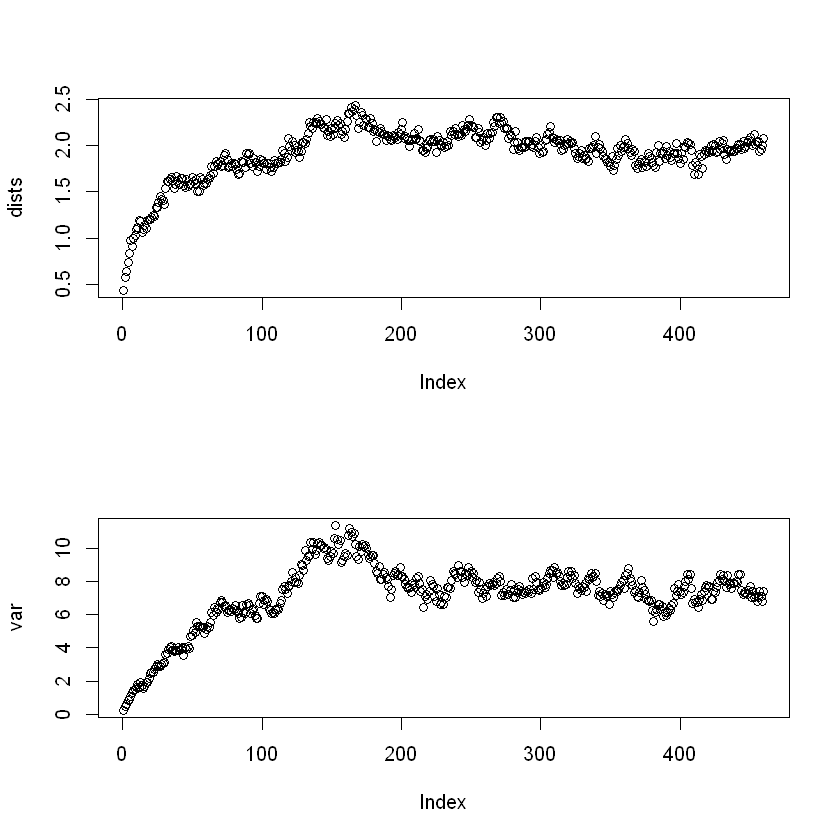

In [106]:
par(mfrow=c(2, 1))
plot(dists)
var = dists2 - dists^2 # check if this is how we do the variance (because I don't want to save all the values)
plot(var)

[1] 1.23

[1] 1.128384

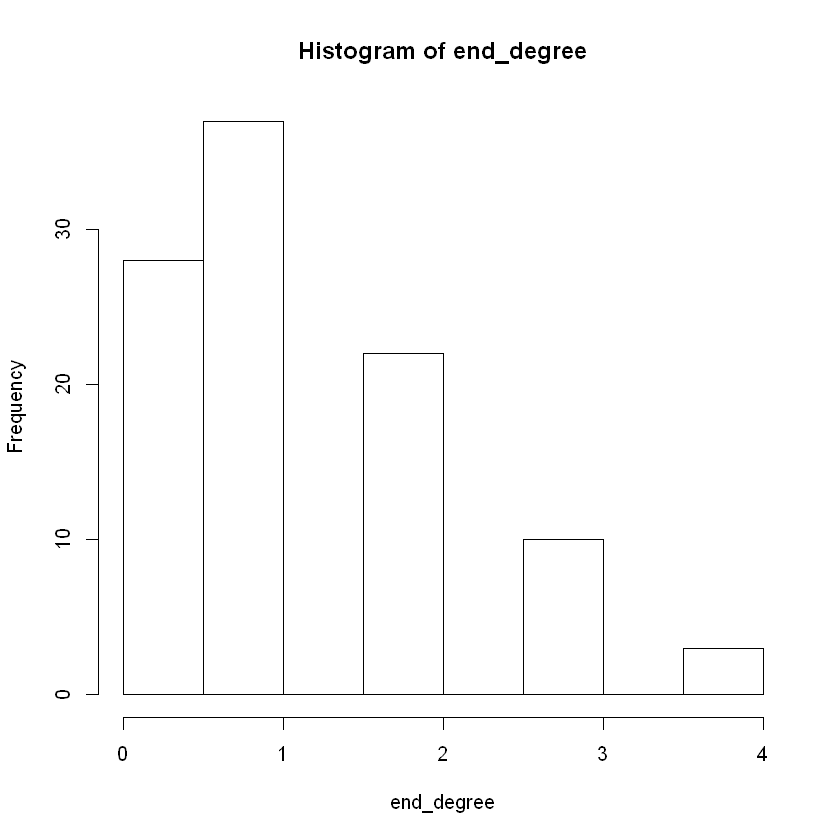

In [107]:
mean(end_degree)
var(end_degree)
hist(end_degree)

Here, similar things apply. However there is still a very important thing to note - because the average degree for the graph is 1, there will most likely be a large amount of disconnections. As a result, not every node can travel to every other node and there will be much larger variations in the possible distances that can be traveled with a random walk. Because of this, it takes much longer to converge (simply due to the large variation involved) and the variance is higher. 

As with the previous example, the end degree has increased, but only slightly. Otherwise the distribution appears roughly the same. 

### Larger Graph (n = 10000)

[1] 3

[1] 100.1444

[1] 99.5555

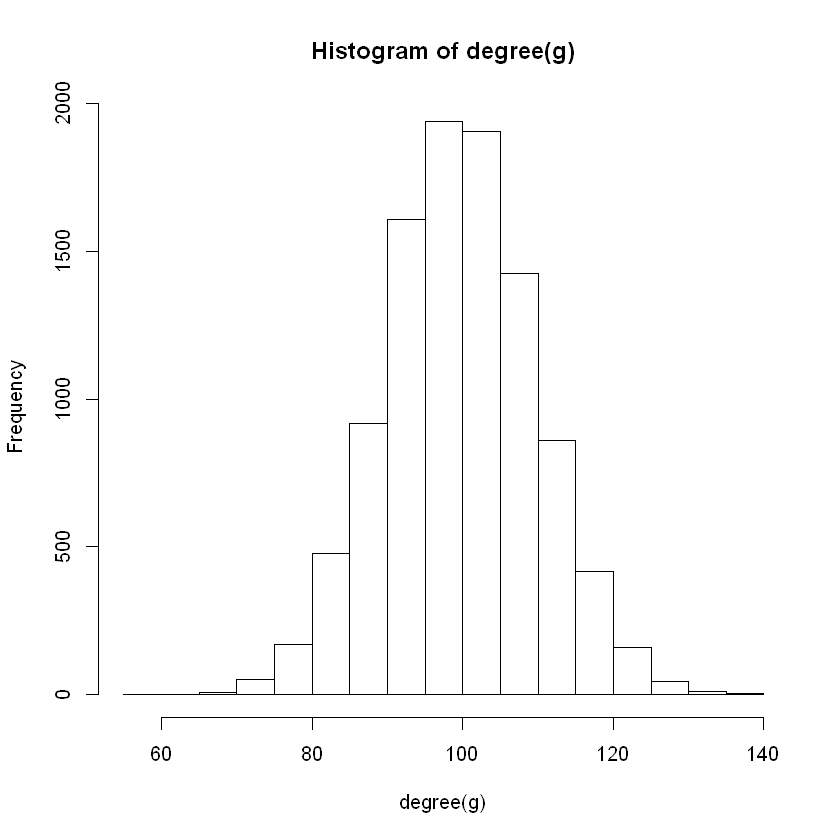

In [93]:
p = 0.01
n = 10000
g = erdos.renyi.game(n, p, directed=F)
#layout <-layout.fruchterman.reingold(g)
#plot(g, layout=layout)

#clusters(g) # potentially for smaller graphs, it may be the case that graphs are disconnected. 

#find the diameter. 
diameter(g)

mean(degree(g))
var(degree(g))
hist(degree(g))

In [94]:
n_trials = 200
t_max = floor(2*log(vcount(g)))

dists = numeric(t_max)
dists2 = numeric(t_max)
end_degree = numeric(n_trials)

for (i in 1:n_trials) {
    v_start = sample(V(g), 1) # get a random node. 
    
    v = v_start
    for (t in 1:t_max) {
        neigh = c(v, neighbors(g, v)) # find all the neighbors to the node. 
        if (length(neigh) == 1)
            v = neigh
        else
            v = sample(neigh, 1) # get a random neighbor. 
        sp = shortest.paths(g, v_start, v)
        dists[t] = dists[t] + sp # keep a running tally of the distances for each time t.
        dists2[t] = dists2[t] + sp^2
    }   
    end_degree[i] = degree(g, v)
}
dists = dists / n_trials; # take the average. 
dists2 = dists2 / n_trials; # take the second moment. 

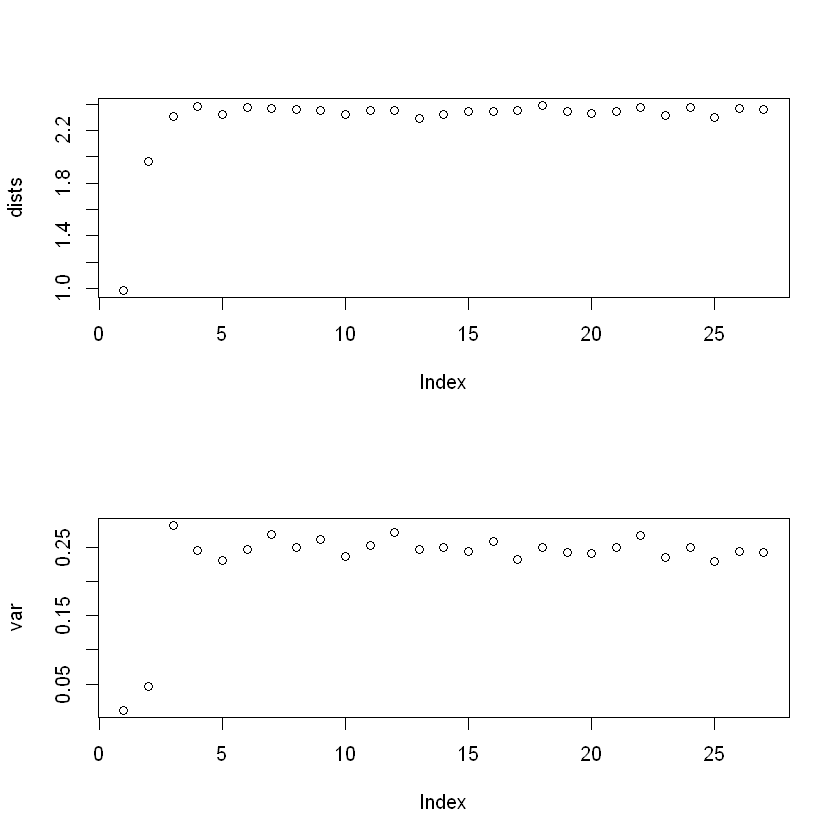

In [99]:
par(mfrow=c(2,1))
plot(dists)
var = dists2 - dists^2 # check if this is how we do the variance (because I don't want to save all the values)
plot(var)

[1] 101.244

[1] 106.6217

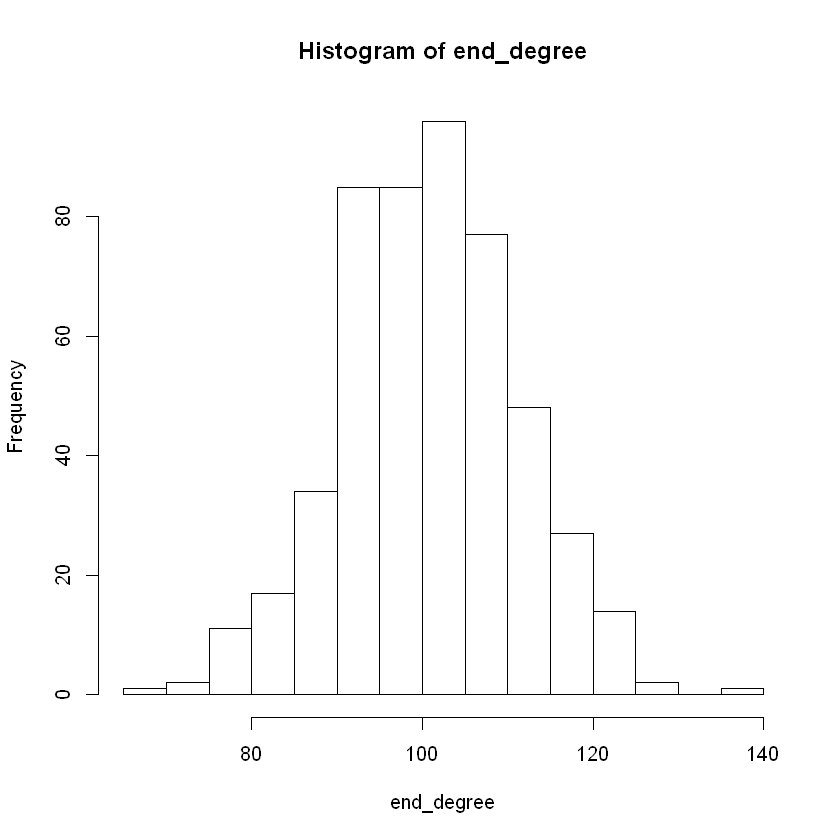

In [98]:
mean(end_degree)
var(end_degree)
par(mfrow=c(1, 1))
hist(end_degree)

Finally, for this graph, it is more connected, due to having an average degree at about 100. As a result, the diameter is smaller and the result of the average distance is also smaller as a result of that. Here, we also see that the end degree is only a tiny bit higher than that of the overall degrees of the graph, a result of having all the nodes being generated in the same way. 

## Random Walks on Preferential Attachment Graphs 

[1] 20

[1] 1.998

[1] 5.155151

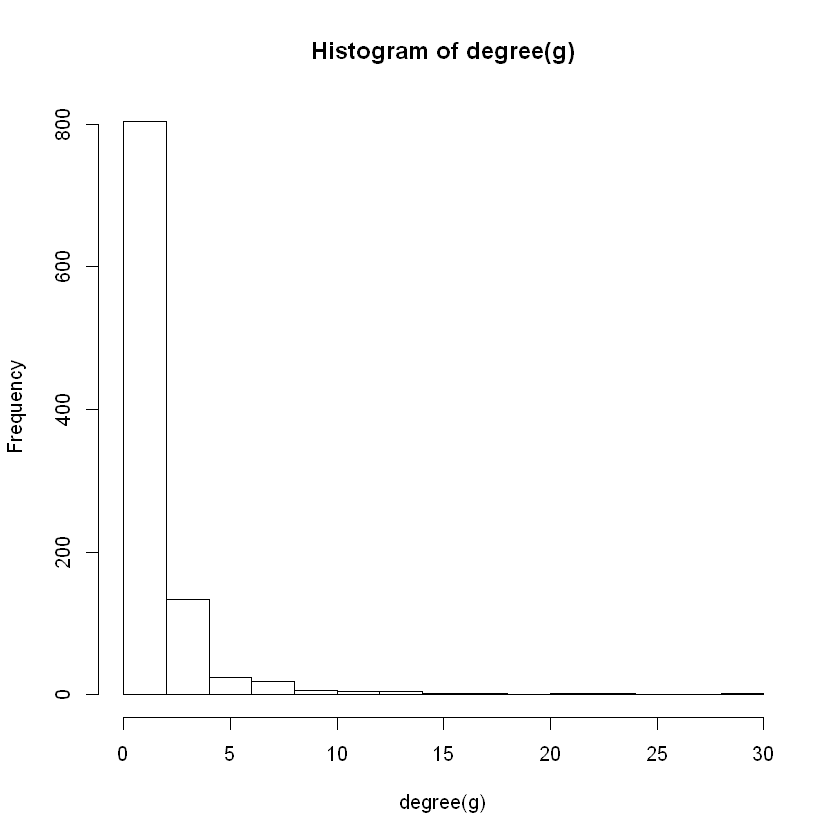

In [120]:
n = 1000
g = barabasi.game(n, directed=F)
#layout <-layout.fruchterman.reingold(g)
#plot(g, layout=layout)

#clusters(g) # potentially for smaller graphs, it may be the case that graphs are disconnected. 

#find the diameter. 
diameter(g)

mean(degree(g))
var(degree(g))
hist(degree(g))

In [124]:
n_trials = 200
t_max = floor(10*log(vcount(g)))

dists = numeric(t_max)
dists2 = numeric(t_max)
end_degree = numeric(n_trials)

for (i in 1:n_trials) {
    v_start = sample(V(g), 1) # get a random node. 
    
    v = v_start
    for (t in 1:t_max) {
        neigh = c(v, neighbors(g, v)) # find all the neighbors to the node. 
        if (length(neigh) == 1)
            v = neigh
        else
            v = sample(neigh, 1) # get a random neighbor. 
        sp = shortest.paths(g, v_start, v)
        dists[t] = dists[t] + sp # keep a running tally of the distances for each time t.
        dists2[t] = dists2[t] + sp^2
    }   
    end_degree[i] = degree(g, v)
}
dists = dists / n_trials; # take the average. 
dists2 = dists2 / n_trials; # take the second moment. 

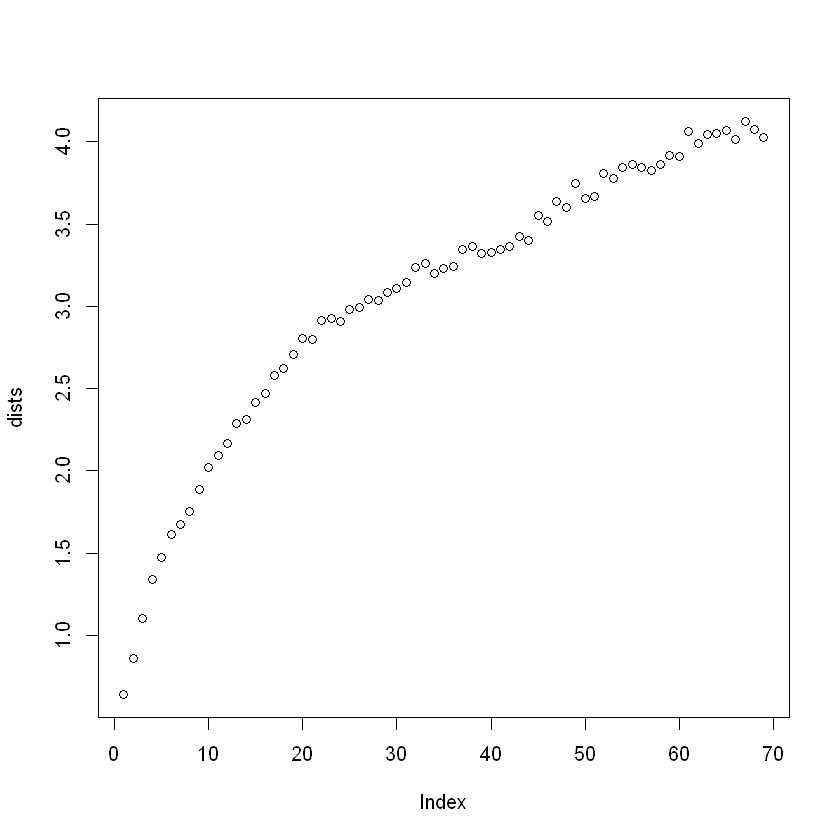

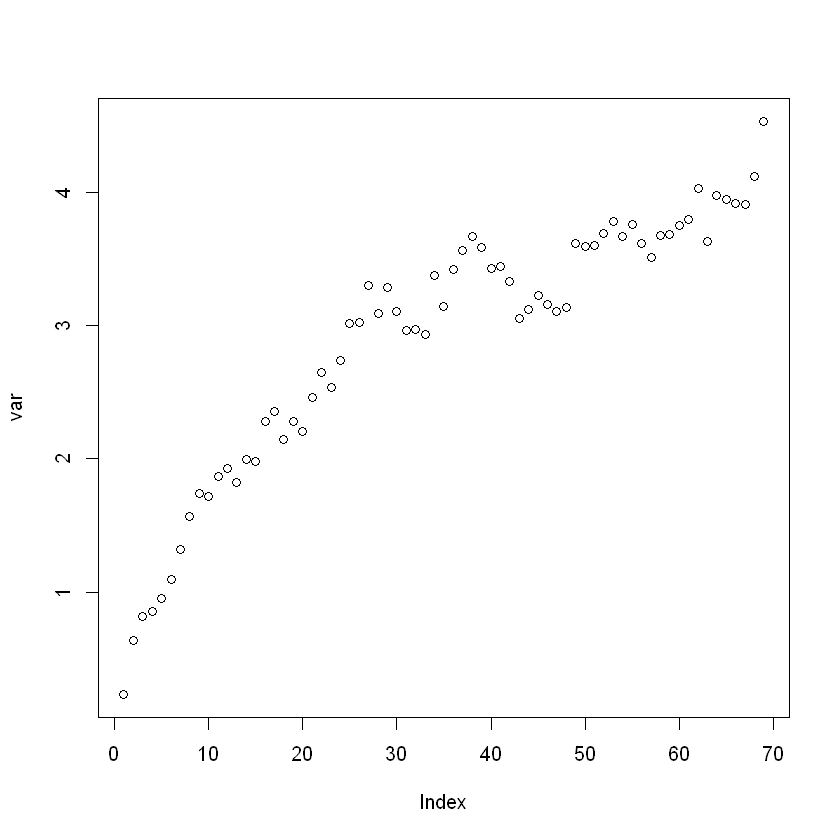

In [125]:
plot(dists)
var = dists2 - dists^2
plot(var)

[1] 3.885

[1] 27.81083

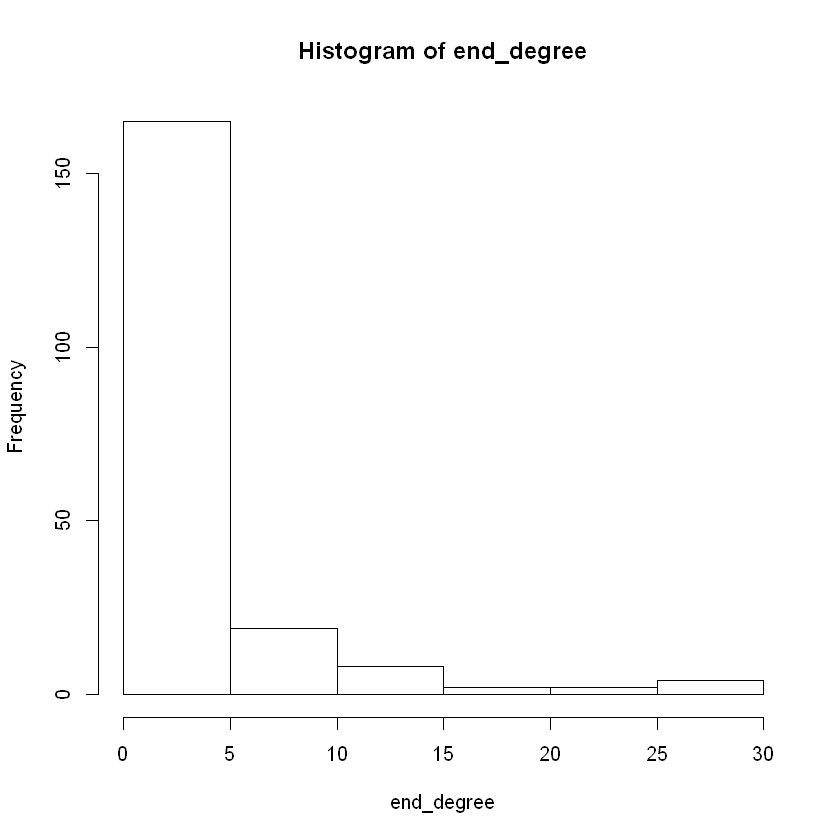

In [126]:
mean(end_degree)
var(end_degree)
hist(end_degree)

Here, the main difference from the ER graph is that the distance and the variance does not actually end up reaching an asymptote within 10ln(N). The growth rate seems to grow as a function of O(ln(t)) for both of the distance and variance. Instead, however, the end degree graph shows a massive increase and showing a massive drop in low degree points. 

### Smaller Graph (n=100)

[1] 12

[1] 1.98

[1] 2.706667

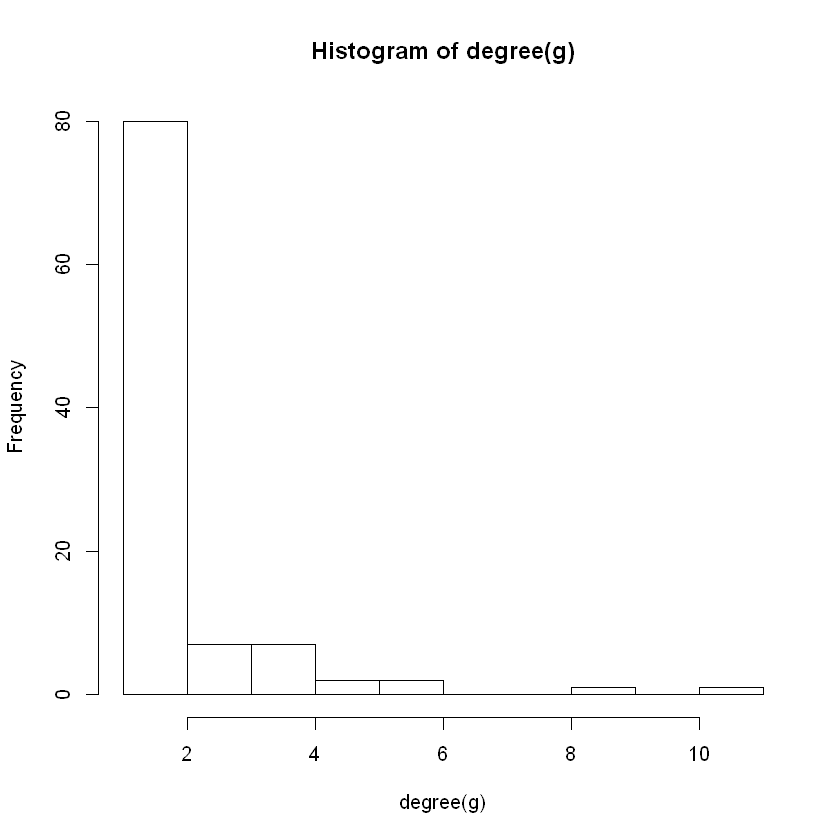

In [127]:
n = 100
g = barabasi.game(n, directed=F)
#layout <-layout.fruchterman.reingold(g)
#plot(g, layout=layout)

#clusters(g) # potentially for smaller graphs, it may be the case that graphs are disconnected. 

#find the diameter. 
diameter(g)

mean(degree(g))
var(degree(g))
hist(degree(g))

In [128]:
n_trials = 200
t_max = floor(10*log(vcount(g)))

dists = numeric(t_max)
dists2 = numeric(t_max)
end_degree = numeric(n_trials)

for (i in 1:n_trials) {
    v_start = sample(V(g), 1) # get a random node. 
    
    v = v_start
    for (t in 1:t_max) {
        neigh = c(v, neighbors(g, v)) # find all the neighbors to the node. 
        if (length(neigh) == 1)
            v = neigh
        else
            v = sample(neigh, 1) # get a random neighbor. 
        sp = shortest.paths(g, v_start, v)
        dists[t] = dists[t] + sp # keep a running tally of the distances for each time t.
        dists2[t] = dists2[t] + sp^2
    }   
    end_degree[i] = degree(g, v)
}
dists = dists / n_trials; # take the average. 
dists2 = dists2 / n_trials; # take the second moment. 

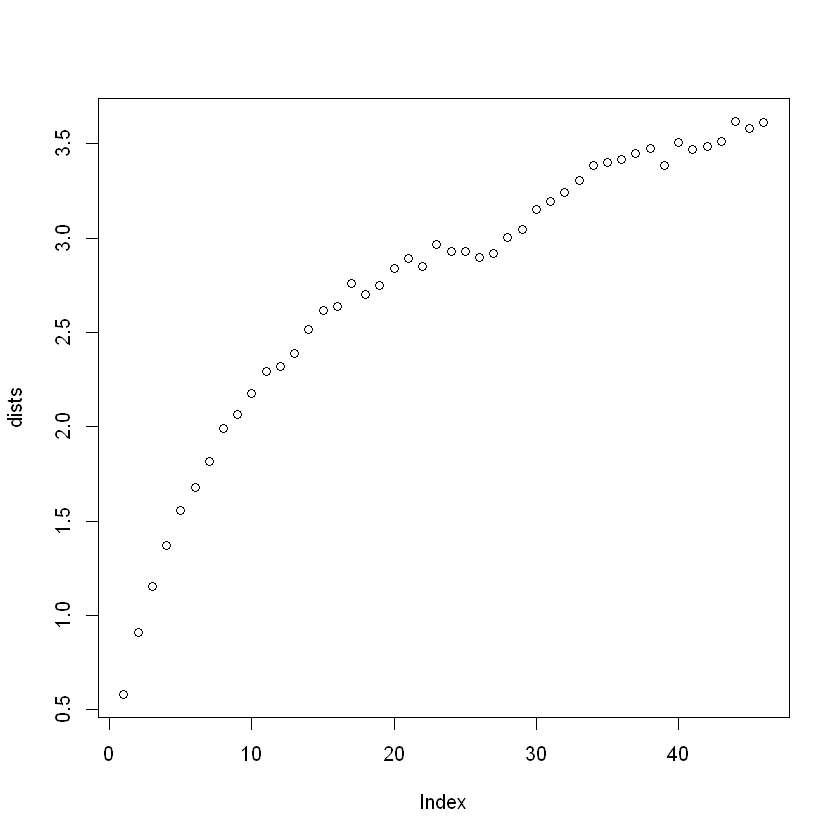

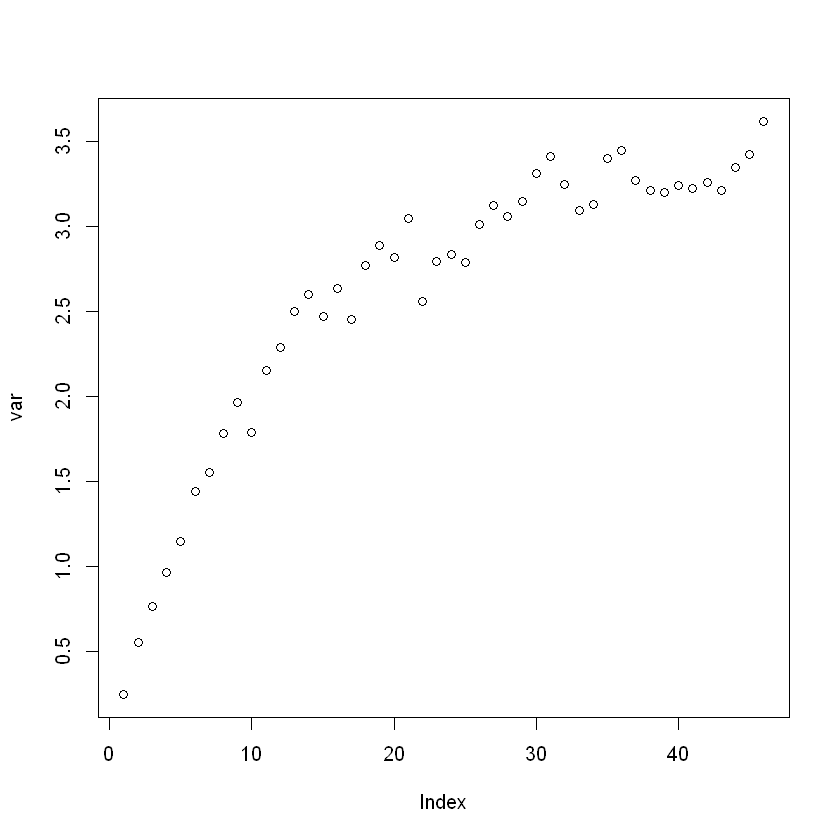

In [129]:
plot(dists)
var = dists2 - dists^2
plot(var)

[1] 2.97

[1] 6.099598

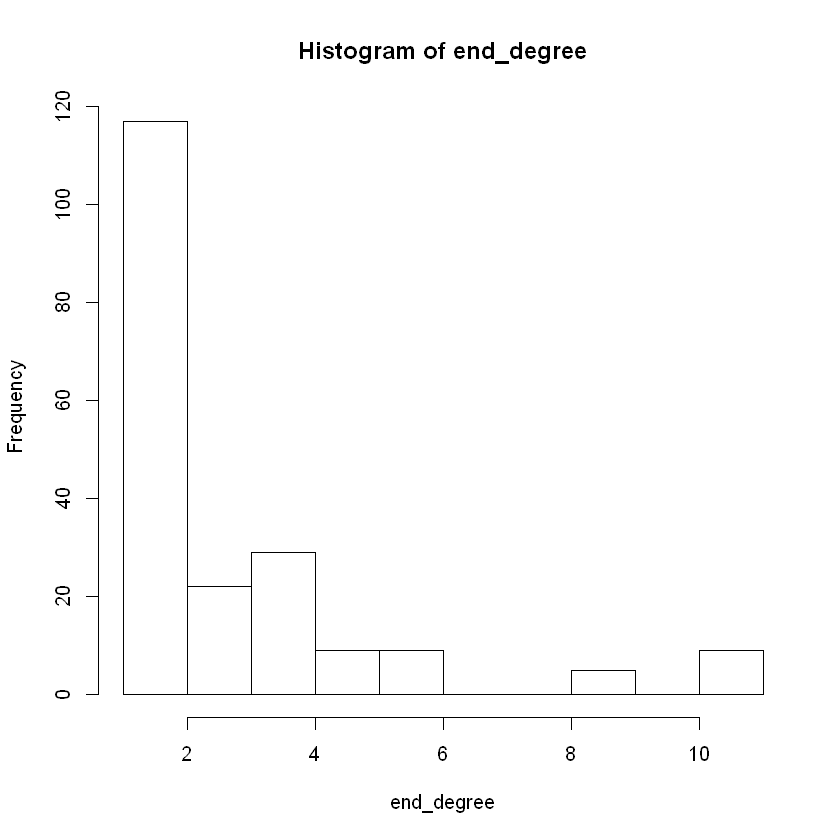

In [130]:
mean(end_degree)
var(end_degree)
hist(end_degree)

Here, the distances are somewhat smaller than the original graph. However, the same properties as described previously still apply - the distance and variances continue to grow far beyond ln(N) and that the end degrees show much higher degree nodes appearing more frequently. 

### Larger Graph (n=10000)

[1] 30

[1] 1.9998

[1] 5.623562

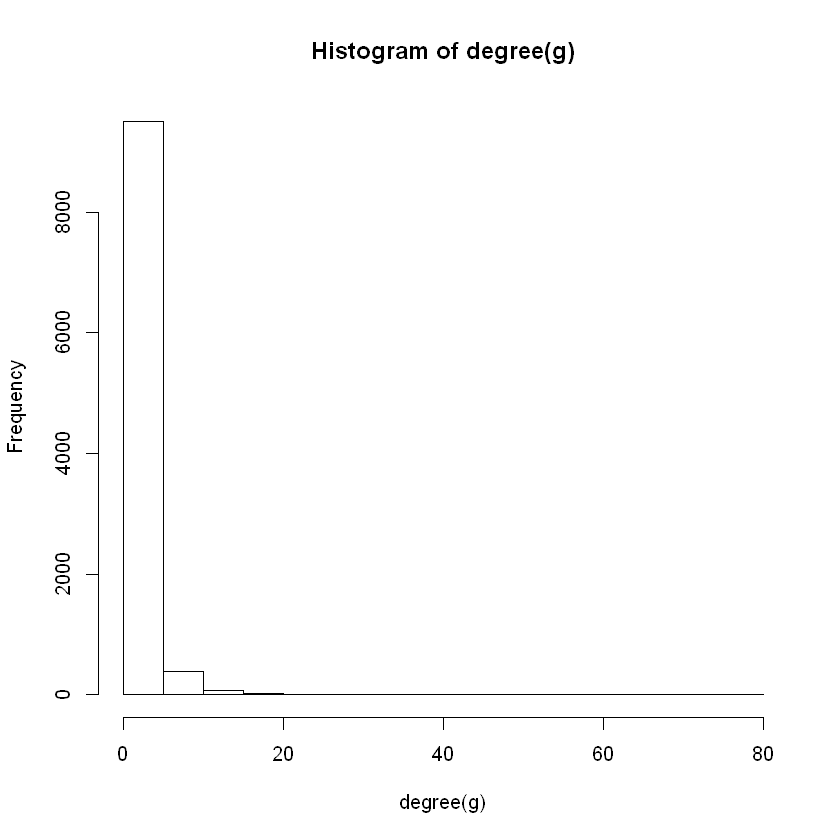

In [131]:
n = 10000
g = barabasi.game(n, directed=F)
#layout <-layout.fruchterman.reingold(g)
#plot(g, layout=layout)

#clusters(g) # potentially for smaller graphs, it may be the case that graphs are disconnected. 

#find the diameter. 
diameter(g)

mean(degree(g))
var(degree(g))
hist(degree(g))

In [132]:
n_trials = 200
t_max = floor(10*log(vcount(g)))

dists = numeric(t_max)
dists2 = numeric(t_max)
end_degree = numeric(n_trials)

for (i in 1:n_trials) {
    v_start = sample(V(g), 1) # get a random node. 
    
    v = v_start
    for (t in 1:t_max) {
        neigh = c(v, neighbors(g, v)) # find all the neighbors to the node. 
        if (length(neigh) == 1)
            v = neigh
        else
            v = sample(neigh, 1) # get a random neighbor. 
        sp = shortest.paths(g, v_start, v)
        dists[t] = dists[t] + sp # keep a running tally of the distances for each time t.
        dists2[t] = dists2[t] + sp^2
    }   
    end_degree[i] = degree(g, v)
}
dists = dists / n_trials; # take the average. 
dists2 = dists2 / n_trials; # take the second moment. 

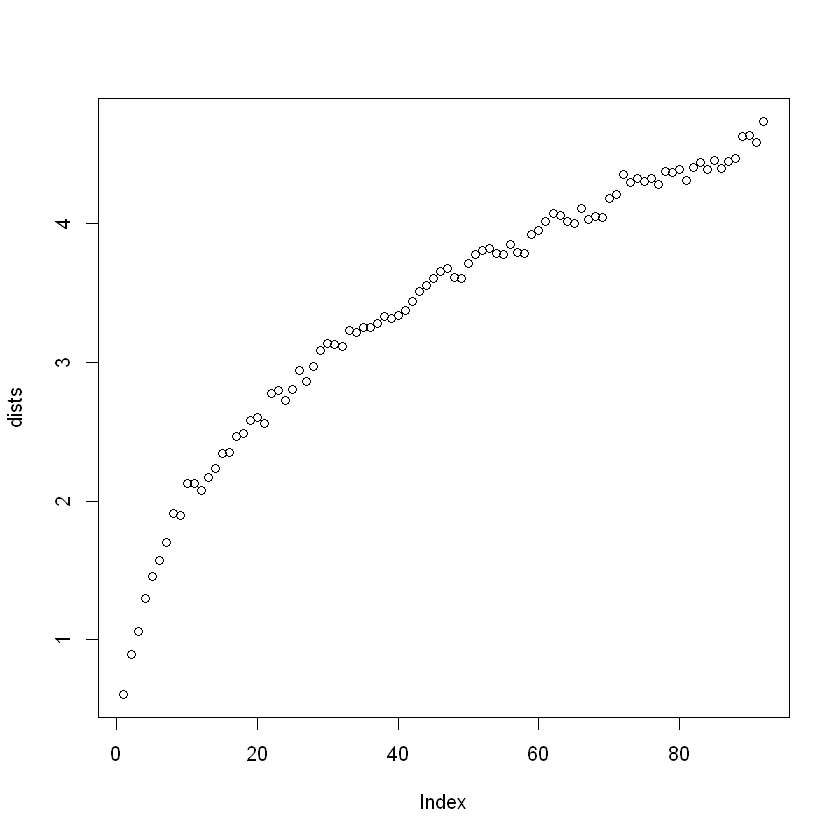

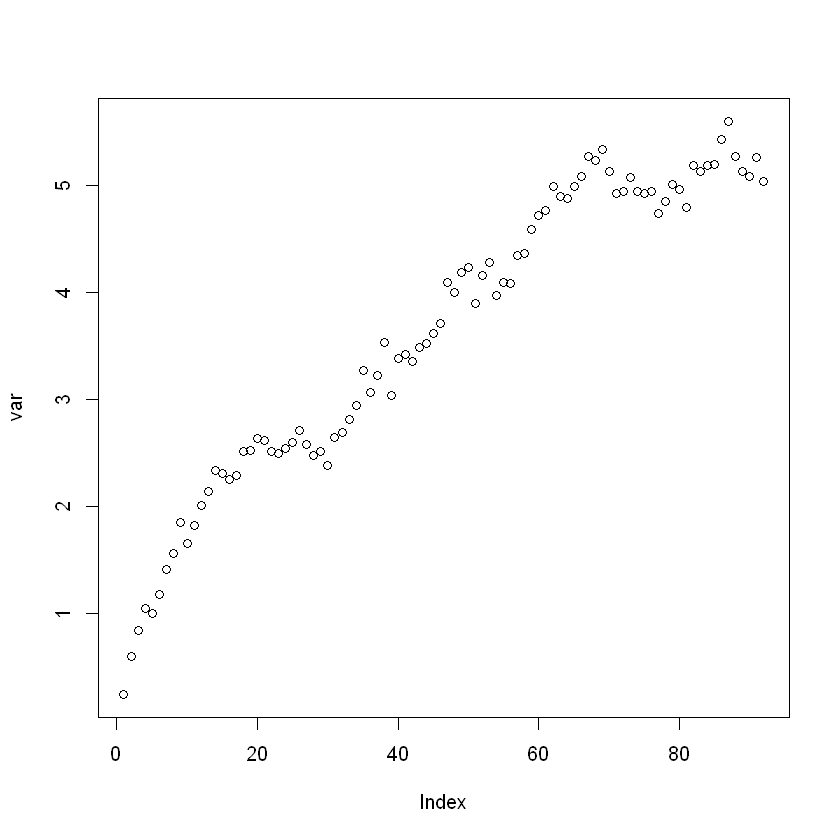

In [133]:
plot(dists)
var = dists2 - dists^2
plot(var)

[1] 3.315

[1] 43.49324

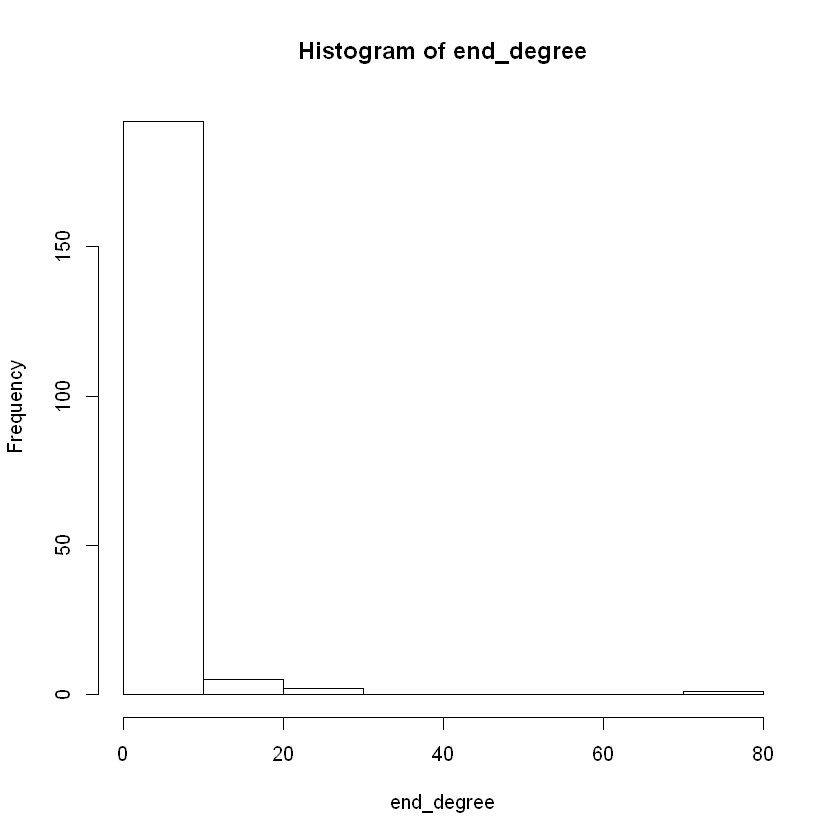

In [134]:
mean(end_degree)
var(end_degree)
hist(end_degree)

Again, the growth rate of the distance and the variance of the distance continue to show similarities to the original graph. All the same patterns apply. 

## PageRank

In [65]:
n = 1000

g = barabasi.game(n, m=4, directed=T)
#layout <-layout.fruchterman.reingold(g)
#plot(g, layout=layout)

#clusters(g) # potentially for smaller graphs, it may be the case that graphs are disconnected. 

#find the diameter. 
diameter(g)

#degree(g)
mean(degree(g))
var(degree(g))
#hist(degree(g)) #may need to add bins here to make it look nicer. 

[1] 9

[1] 7.98

[1] 340.0857

In [66]:
n_trials = 100
t_max = floor(2*log(vcount(g)))

visit_count = numeric(vcount(g))

for (i in 1:n_trials) {
    v = sample(V(g), 1) # get a random node. 
    visit_count[v] = visit_count[v] + 1
    for (t in 1:t_max) {
        neigh = c(v, neighbors(g, v)) # find all the neighbors to the node. 
        if (length(neigh) == 1)
            v = neigh
        else
            v = sample(neigh, 1) # get a random neighbor. 
        visit_count[v] = visit_count[v] + 1
    }
}
prob_visit = visit_count / n_trials / t_max;

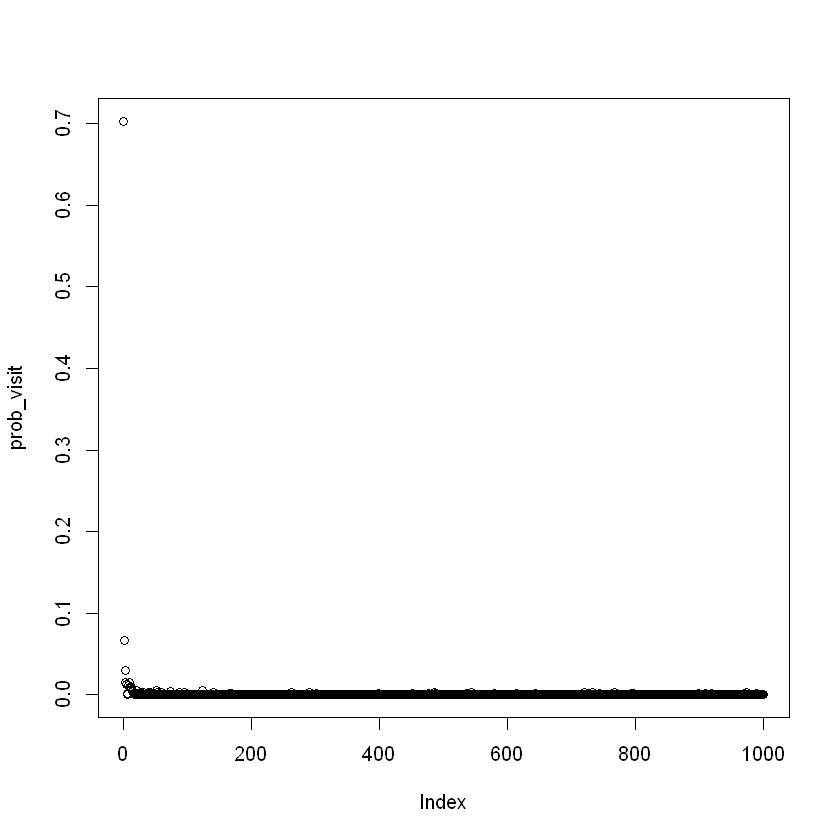

In [67]:
plot(prob_visit)

In [68]:
n_trials = 1000
t_max = floor(2*log(vcount(g)))

visit_count = numeric(vcount(g))

for (i in 1:n_trials) {
    v = sample(V(g), 1) # get a random node. 
    visit_count[v] = visit_count[v] + 1
    for (t in 1:t_max) {
        rand = sample(100, 1)
        if ( rand < 15 ) {
            v = sample(V(g), 1) # get a random node. 
            visit_count[v] = visit_count[v] + 1
        } else {
            neigh = c(v, neighbors(g, v)) # find all the neighbors to the node. 
            if (length(neigh) == 1)
                v = neigh
            else
                v = sample(neigh, 1) # get a random neighbor. 
            visit_count[v] = visit_count[v] + 1
        }
    }
}
prob_visit = visit_count / n_trials / t_max;

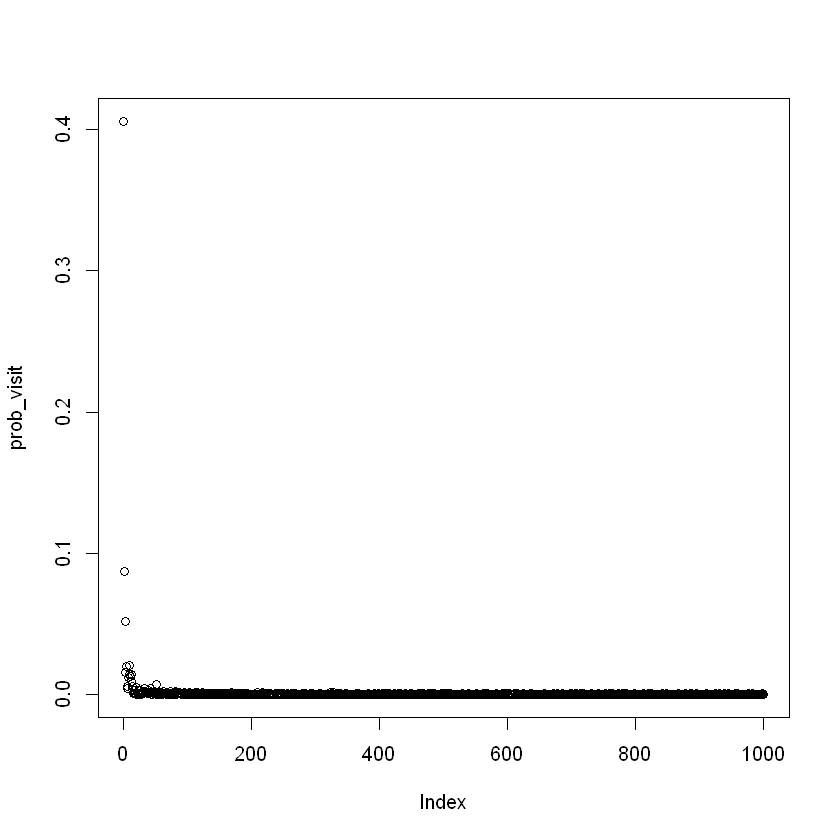

In [69]:
plot(prob_visit)